# CTA200H 2023 Assignment 2

In [47]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

## Part 1
- Write a python function for the function $f(x) = x^3 − x^2 − 1$. Also, write a function for it’s derivative, you can call these functions ‘f’ and ‘df’.

In [62]:
def f(x_eval):
    '''
    Simple function returned.
    '''
    f = x_eval**3 - x_eval**2 - 1
    return f

def df(x_eval):
    '''
    Derivative of simple function above returned.
    '''
    x =sym.Symbol('x')
    f = x**3 - x**2 - 1
    df = sym.diff(f)
    df_eval = float(df.evalf(subs={x: x_eval}))
    return df_eval

## Part 2
- Write a function ‘newton(f, df, x0, epsilon=1e-6, max iter=30)’ which performs a Newton Iteration of the
function ‘f’ with derivative ‘df’.

- Newton iteration finds the root ($x_n$ such that $f(x_n) = 0$).

- To do this, implement the recursive expression x_{n+1} = x_n−\frac{f(x_n)}{f'(x_n)}$ using a loop.

- The iteration should stop either when ‘max iter’ is exceeded or when $|f(x_n)| < \epsilon$.

- If the method succeeds, (ie $|f(x_n) < \epsilon$), then your function should print "Found root in ¡N¿ iterations" and should return the value of x_n. Otherwise, it should print ‘”Iteration failed”’ and return ‘None’. 

- Make sure that your function is documented with Numpy style documentation.

In [29]:
def newton(f, df, x0, epsilon=1e-6, max_iter=30):
    '''
    Performs a Newton Iteration of the function ‘f’ 
    with derivative ‘df’.
    
    Inputs
    -----------------------------------------------
    f: function to search for roots
    df: derivative of f
    x0: intial guess of root
    epsilon: absolute tolerance
    max_iter: maximum iterations of Newton's method
    
    Outputs
    -----------------------------------------------
    x_fin: final root.
    '''
    x = x0
    itr = 0
    func_status = "Iteration failed"
    x_fin = None
    while itr <= max_iter:
        if np.abs(f(x))<epsilon:
            func_status = "Found root in {} iterations".format(itr)
            x_fin = x
            break
        else:
            x_new = x - f(x)/df(x)
            x = x_new
            itr+=1
    
    print(func_status)
    
    return x_fin

## Part 3
- Try out your function with the function you defined in part 1. You can experiment with setting $x_0$ differently
(show at least two examples of $x_0$ in the notebook). Leave epsilon and ‘max_iter’ as the default values specified
in part 2.

- Try reducing ‘epsilon’ to 1e-8. Does it still work? If so, how many more iterations does it take to converge

In [30]:
# Test 1 x_0 = 10
x0 = 10
newton(f, df, x0, epsilon=1e-6, max_iter=30)

Found root in 9 iterations


1.465571232470246

In [40]:
# Test 2 x_0 = 1000
x0 = 1000
newton(f, df, x0, epsilon=1e-6, max_iter=30)

Found root in 26 iterations


1.4655712352599874

In [42]:
# Test 3 x_0 = 1000, epsilon = 1e-8
x0 = 1000
epsilon = 1.0e-8
newton(f, df, x0, epsilon, max_iter=30)

Found root in 21 iterations


1.4655712318767944

**It takes 1 more iteration for the function to converge.**

Found root in 20 iterations
Found root in 21 iterations


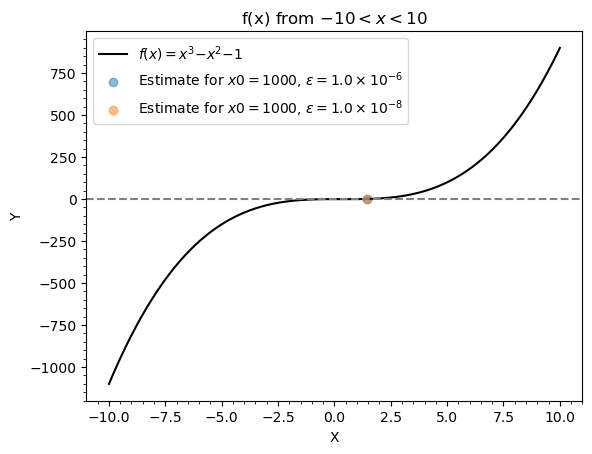

In [95]:
x = np.linspace(-10,10, 1000)
y = f(x)

fig, ax = plt.subplots(1)
ax.plot(x,y,label=r"$f(x) = x^3 − x^2 − 1$", c='k')
ax.scatter(newton(f, df, 1000, epsilon=1e-6, max_iter=30),0, c='C0', alpha=0.5,
           label=r"Estimate for $x0=1000$, $\epsilon=1.0\times10^{-6}$")
ax.scatter(newton(f, df, 1000, epsilon=1e-8, max_iter=30),0, c='C1', alpha=0.5,
           label=r"Estimate for $x0=1000$, $\epsilon=1.0\times10^{-8}$")
ax.axhline(y=0, ls='--', c = 'grey')
ax.set_title(r'f(x) from $-10<x<10$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.minorticks_on()

plt.show()